In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import date
%matplotlib inline

In [2]:
df=pd.read_csv('football_players.csv')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           54 non-null     int64  
 1   Origin         54 non-null     object 
 2   Player         54 non-null     object 
 3   From(Country)  54 non-null     object 
 4   From(Club)     54 non-null     object 
 5   To(Country)    54 non-null     object 
 6   To(Club)       54 non-null     object 
 7   Position       54 non-null     object 
 8   Fee(€ mln)     54 non-null     float64
 9   Fee(£ mln)     54 non-null     object 
 10  Year           54 non-null     int64  
 11  Born           54 non-null     int64  
 12  Age            54 non-null     int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 5.6+ KB


In [13]:
df['Age']=df['Born'].map(lambda year_birth: date.today().year-year_birth)

In [14]:
df.head()

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born,Age
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992,29
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998,23
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992,29
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999,22
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991,30


In [15]:
df.describe()

,Rank,Fee(€ mln),Year,Born,Age
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,27.444444,83.159259,2016.629630,1991.888889,29.111111
std,15.716434,30.174258,4.296977,5.932535,5.932535
min,1.000000,60.000000,2000.000000,1972.000000,21.000000
25%,14.250000,64.625000,2015.250000,1989.250000,25.000000
50%,27.500000,75.000000,2018.000000,1993.000000,28.000000
75%,40.750000,86.500000,2019.000000,1996.000000,31.750000
max,54.000000,222.000000,2021.000000,2000.000000,49.000000


In [20]:
fee_grouped=df['Fee(€ mln)'].groupby(df['From(Country)']).sum()


<AxesSubplot:title={'center':'Total fee per country'}, xlabel='From(Country)', ylabel='Fee in MIL'>

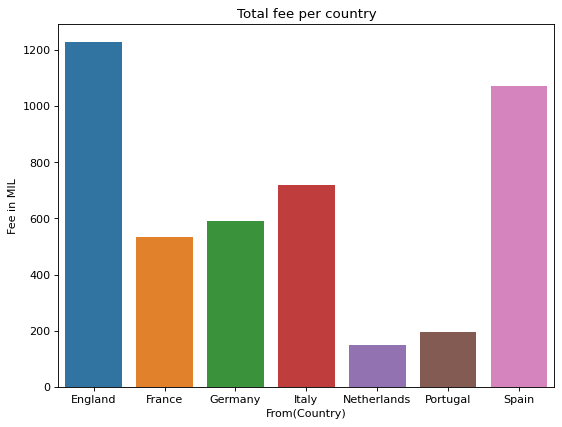

In [36]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Total fee per country')
plt.ylabel('Fee in MIL')
sns.barplot(x=fee_grouped.index, y=fee_grouped.values)

In [84]:
df.loc[df['Rank']==34,['Player']]='Zlatan Ibrahimović'

<AxesSubplot:xlabel='Player', ylabel='Fee(€ mln)'>

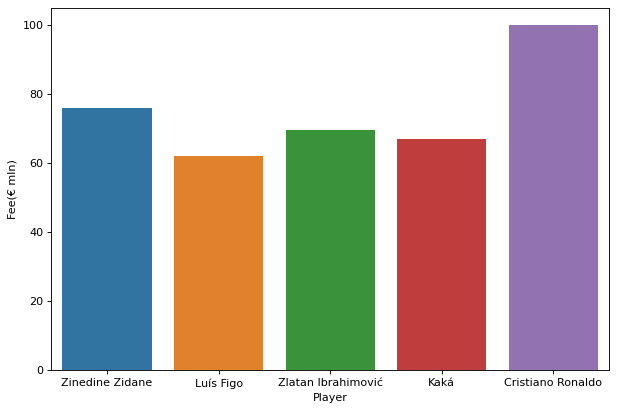

In [85]:
oldeser_players_fee=df.sort_values('Age',ascending=False)[['Player','Fee(€ mln)','Rank']].head(5)
plt.figure(figsize=(9, 6), dpi=80)
sns.barplot(x=oldeser_players_fee['Player'], y=oldeser_players_fee['Fee(€ mln)'])